In [ ]:
#Q.1.
'''
Red Wine Quality Prediction Project
Q. Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv 
'''
    
    


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #not required as its copied
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.head() #The head() method returns a specified number of rows, string from the top. The head() method returns the first 5 rows if a number is not specified. 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.tail() #The tail() method returns a specified number of rows, string from the last.


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [5]:
df.shape # to check the dimension of the data set (rows, columns)

(1599, 12)

In [6]:
df.dtypes #Checking the types of columns

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#checking the null Values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info() #detailed information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
#checking the value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [11]:
#checking number of unique value in each column
df.nunique().to_frame('no. of unique values')

no. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

In [12]:
# To convert the 'quality' variable into binary classes (good/1 and not good/0) based on the given cutoff 
df['good_wine'] = (df['quality'] >= 7).astype(int) #astype() method returns a new DataFrame where the data types has been changed to the specified type.
df


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  good_wine  
0         9.4        5          0  
1         9.8        5          0  
2         9.8        5          0  
3         9.8        6          0  
4         9.4        5          0  
...       ...      ...        ...  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          0  

[1599 rows x 13 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  good_wine             1599 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.3 KB


In [ ]:
# DATA VISUALISATION

0    1382
1     217
Name: good_wine, dtype: int64


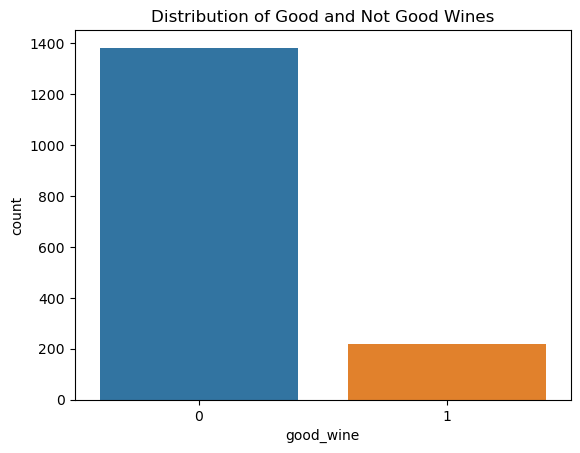

In [14]:
#Visualising the no. of good_wines
sns.countplot(x='good_wine', data=df)
plt.title('Distribution of Good and Not Good Wines')
print(df['good_wine'].value_counts())
plt.show()


In [15]:
#seperating numerical columns (NOT NEEDED)
numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical Columns', numerical_col)
    



Numerical Columns ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'good_wine']


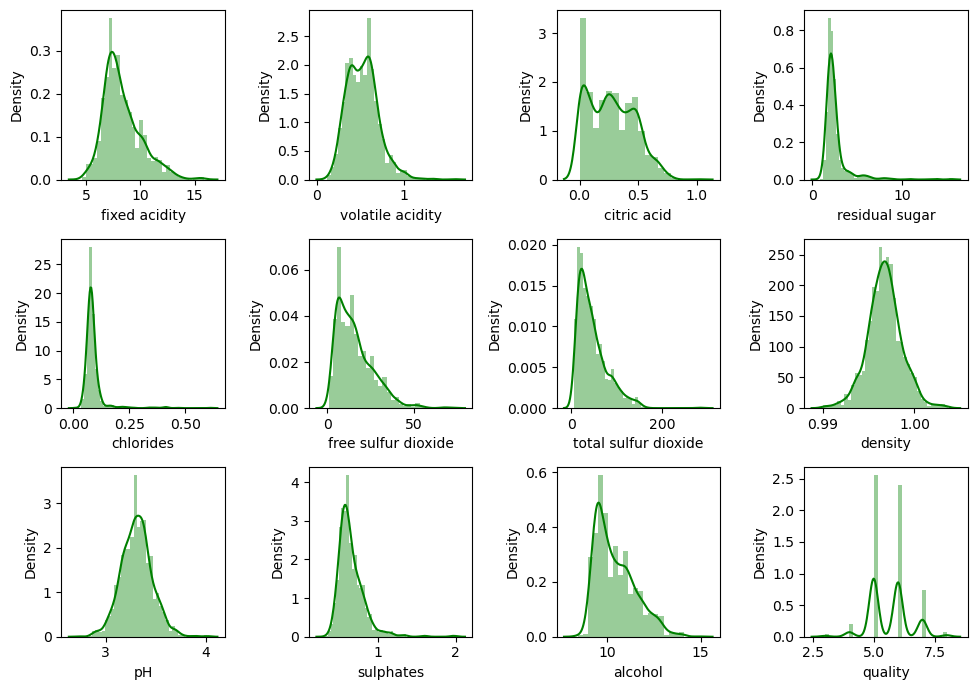

In [16]:
#lets check how the data has been distributed in remaining column (NOT NEEDED)
plt.figure(figsize = (10, 7), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col], color='g')        
        plt.yticks(rotation=0, fontsize= 10)
    plotnumber+=1
plt.tight_layout()
    

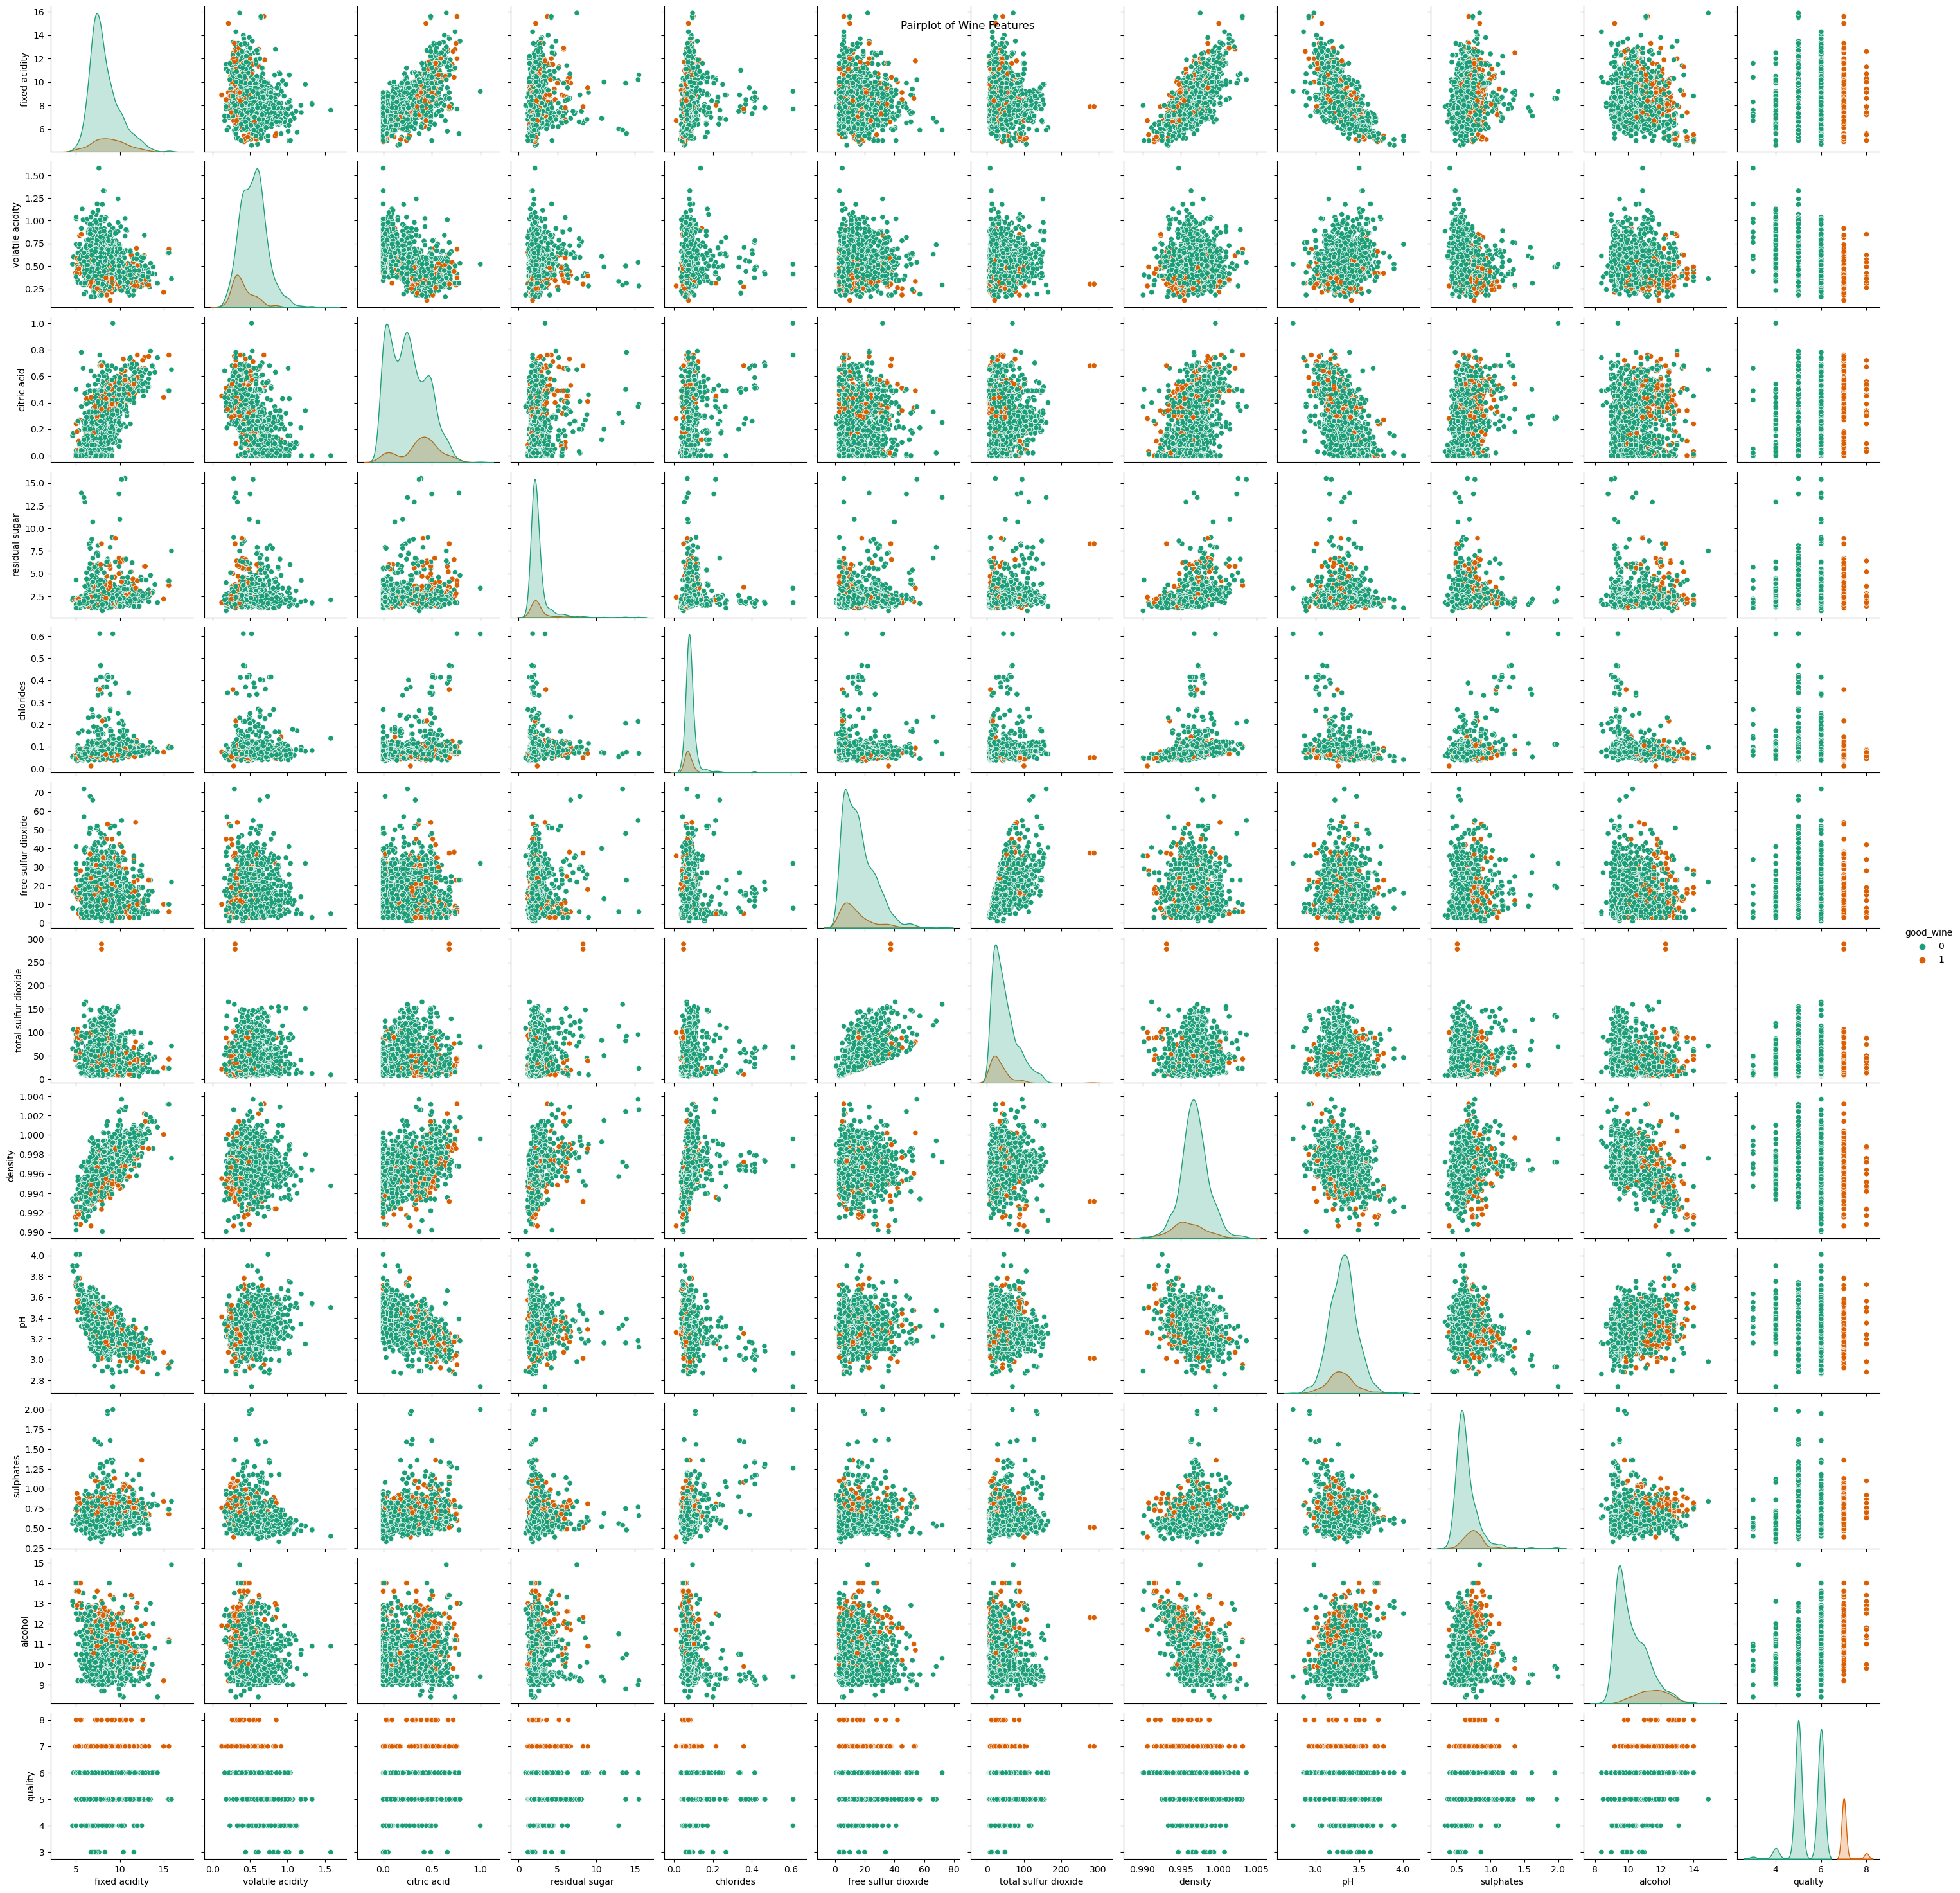

In [16]:
# pairplot to visualize the relationships between multiple variables (Multivariate Analysis)
sns.pairplot(df, hue='good_wine', palette='Dark2') 
plt.suptitle("Pairplot of Wine Features")
plt.show()


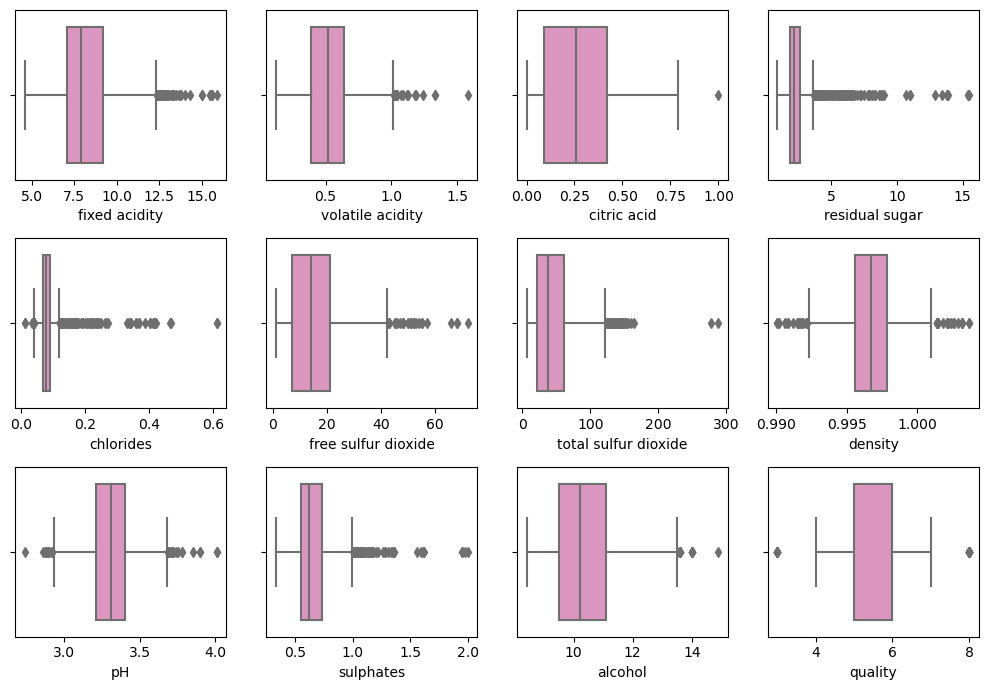

In [11]:
#lets check the outliners by plotting box plot
plt.figure(figsize = (10, 7), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')        
        plt.xlabel(col, fontsize= 10)
        plt.yticks(rotation=0, fontsize= 10)
    plotnumber+=1
plt.tight_layout()

In [17]:
df.skew() #default acceptable range is [-0.5 to +0.5] ,NOTE:not all models are sensitive to skewness, and some machine learning algorithms, like decision trees, can handle skewed data reasonably well. If the model performs well without addressing skewness, we might not need to apply transformations.

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
good_wine               2.129363
dtype: float64

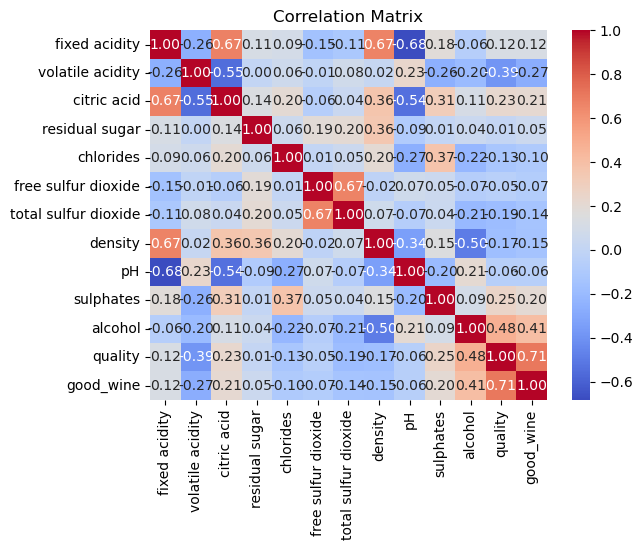

In [18]:
#Correlation Matrix, (NOTE: 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship. It’s most commonly used in building regression models)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [19]:
#Checking the correlation between feature and the target. NOTE: RAnge is from (-1 to +1) & 0 represent no correlation
cor=df.corr()
cor


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
good_wine                  0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   
good_wine                   0.047779  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   
good_wine                        -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol   quality  good_wine  
fixed acidity        -0.061668  0.124052   0.120061  
volatile acidity     -0.202288 -0.390558  -0.270712  
citric acid           0.109903  0.226373   0.214716  
residual sugar        0.042075  0.013732   0.047779  
chlorides            -0.221141 -0.128907  -0.097308  
free sulfur dioxide  -0.069408 -0.050656  -0.071747  
total sulfur dioxide -0.205654 -0.185100  -0.139517  
density              -0.496180 -0.174919  -0.150460  
pH                    0.205633 -0.057731  -0.057283  
sulphates             0.093595  0.251397   0.199485  
alcohol               1.000000  0.476166   0.407315  
quality               0.476166  1.000000   0.710196  
good_wine             0.407315  0.710196   1.000000

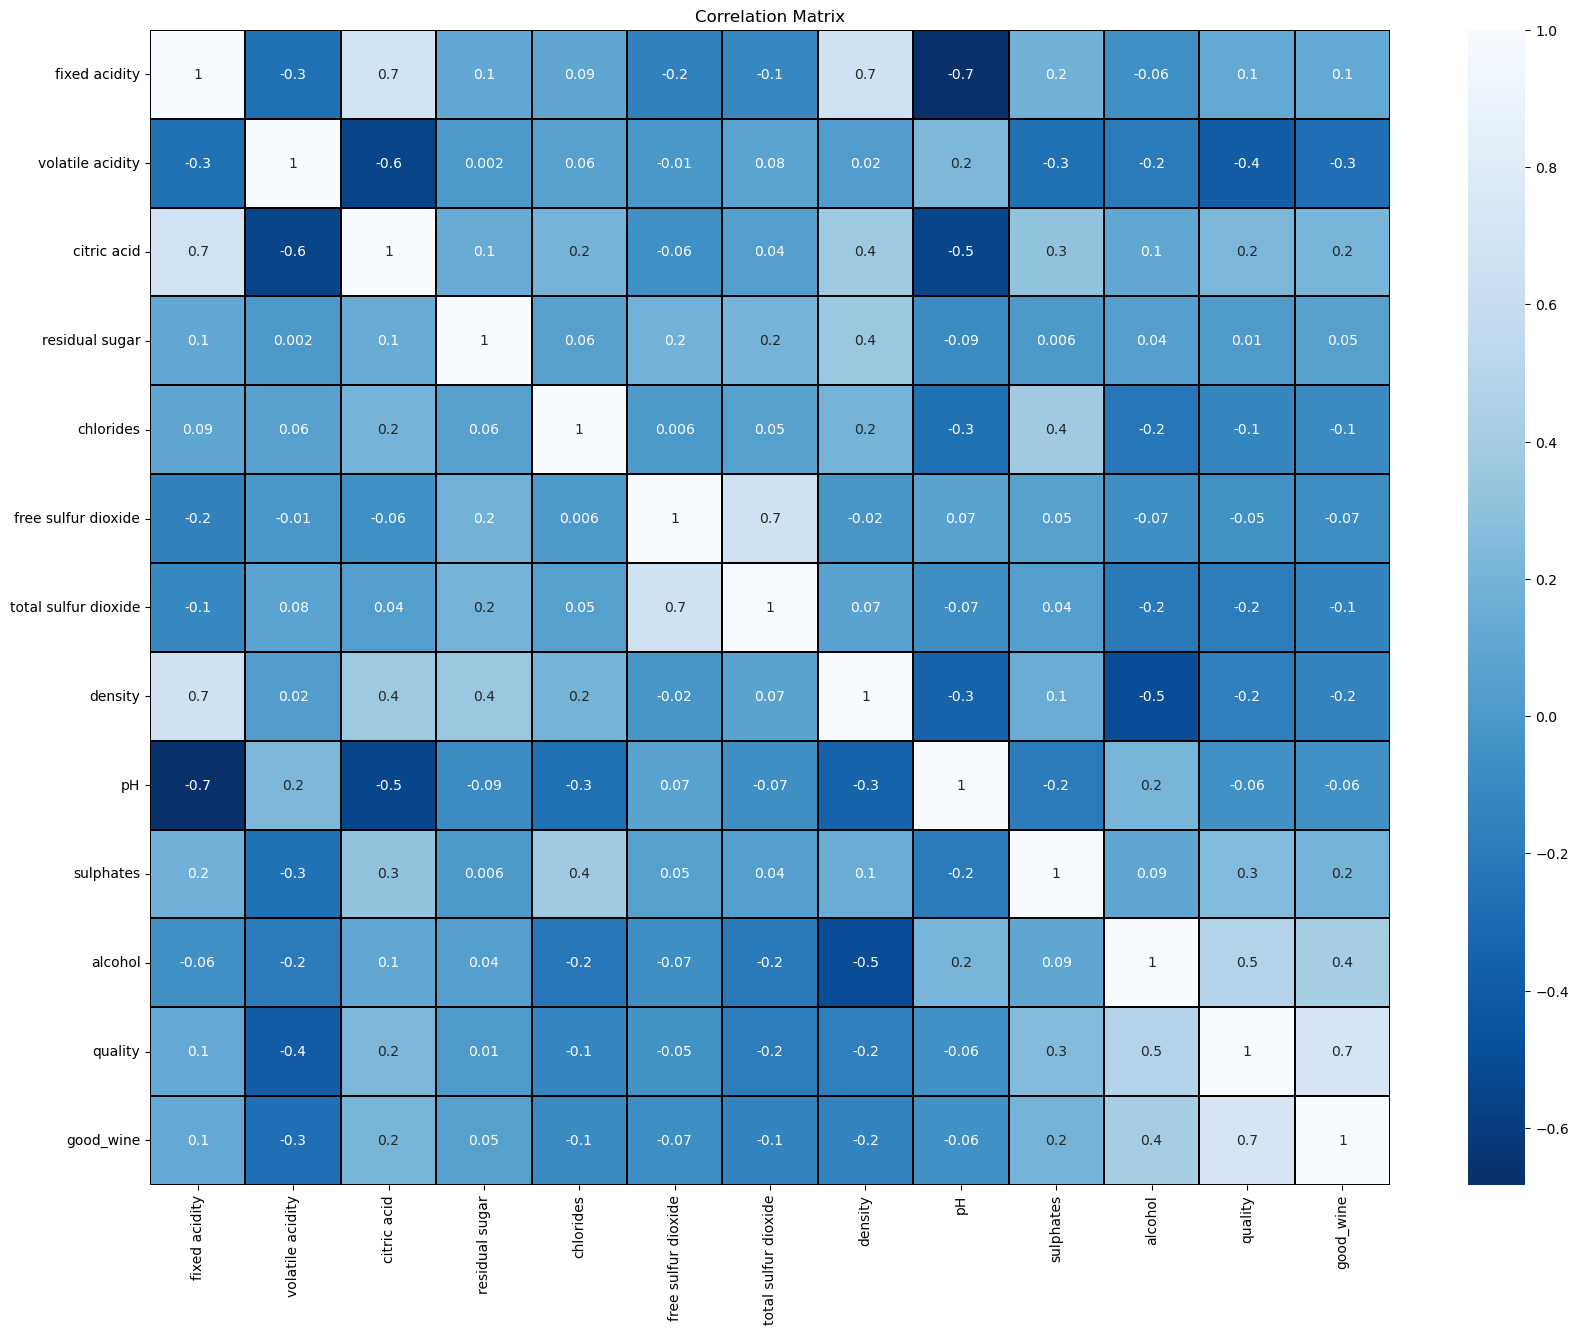

In [20]:
#Visualising the correlation matrix by plotting heat map
plt.figure(figsize=(20,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', linecolor='black', fmt=".1g", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

# NOTE: 0- no relation, -0.3 to +0.3 - less correlation, greater than -0.5 or greater than +0.5 - moderate correlation, greater than -0.7 or greater than +0.7 high correlation

In [28]:
cor['good_wine'].sort_values(ascending= False)

good_wine               1.000000
quality                 0.710196
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: good_wine, dtype: float64

In [29]:
# Split the dataset into features (x) and target variable (y)
x = df.drop(['quality', 'good_wine'], axis=1)
y = df['good_wine']

In [30]:
y.value_counts() # to check if data is balanced or not, if needed we might need to do oversampling

0    1382
1     217
Name: good_wine, dtype: int64

In [31]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1, 200):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    # Initialize RandomForestClassifier
    RFR = RandomForestClassifier()
    
    # Train the model
    RFR.fit(x_train, y_train)
    
    # Make predictions
    pred = RFR.predict(x_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, pred)
    
    # Update max accuracy and corresponding random state if the current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best accuracy is", maxAccu, "at random_state", maxRS)

    
 # best accurcy is 93.75% at random state 48

Best accuracy is 0.9333333333333333 at random_state 132


In [32]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= i)


In [34]:
#Classification algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


In [35]:
#Checking accuracy for RandomForestClassifier

# Initialize the RandomForestClassifier
RFC = RandomForestClassifier()

# Train the model on the training set
RFC.fit(x_train, y_train)
# Make predictions on the testing set
predRFC= RFC.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predRFC))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predRFC))
print('\nClassification Report:\n',classification_report(y_test ,predRFC))

Accuracy: 0.9020833333333333

Confusion Matrix:
 [[405   6]
 [ 41  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       411
           1       0.82      0.41      0.54        69

    accuracy                           0.90       480
   macro avg       0.87      0.70      0.74       480
weighted avg       0.90      0.90      0.89       480



In [36]:
#Checking accuracy for LogisticRegression

# Initialize the LogisticRegression
LR = LogisticRegression()

# Train the model on the training set
LR.fit(x_train, y_train)
# Make predictions on the testing set
predLR= LR.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predLR))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predLR))
print('\nClassification Report:\n',classification_report(y_test ,predLR))

Accuracy: 0.8583333333333333

Confusion Matrix:
 [[399  12]
 [ 56  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       411
           1       0.52      0.19      0.28        69

    accuracy                           0.86       480
   macro avg       0.70      0.58      0.60       480
weighted avg       0.83      0.86      0.83       480



In [37]:
#Checking accuracy for support vector machine classifier

# Initialize the SVC
svc = SVC()

# Train the model on the training set
svc.fit(x_train, y_train)
# Make predictions on the testing set
predsvc= svc.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predsvc))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predsvc))
print('\nClassification Report:\n',classification_report(y_test ,predsvc))

Accuracy: 0.8583333333333333

Confusion Matrix:
 [[411   0]
 [ 68   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       411
           1       1.00      0.01      0.03        69

    accuracy                           0.86       480
   macro avg       0.93      0.51      0.48       480
weighted avg       0.88      0.86      0.79       480



In [38]:
#Checking accuracy for Gradient Boosting classifier

# Initialize the Gradient Boosting classifier
GB = GradientBoostingClassifier()

# Train the model on the training set
GB.fit(x_train, y_train)
# Make predictions on the testing set
predGB= GB.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predGB))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predGB))
print('\nClassification Report:\n',classification_report(y_test ,predGB))

Accuracy: 0.88125

Confusion Matrix:
 [[398  13]
 [ 44  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       411
           1       0.66      0.36      0.47        69

    accuracy                           0.88       480
   macro avg       0.78      0.67      0.70       480
weighted avg       0.87      0.88      0.87       480



In [39]:
#Checking accuracy for AdaBoost classifier

# Initialize the AdaBoost classifier 
ABC = AdaBoostClassifier()

# Train the model on the training set
ABC.fit(x_train, y_train)
# Make predictions on the testing set
predABC= ABC.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predABC))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predABC))
print('\nClassification Report:\n',classification_report(y_test ,predABC))

Accuracy: 0.8645833333333334

Confusion Matrix:
 [[395  16]
 [ 49  20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       411
           1       0.56      0.29      0.38        69

    accuracy                           0.86       480
   macro avg       0.72      0.63      0.65       480
weighted avg       0.84      0.86      0.85       480



In [40]:
#Checking accuracy for ExtraTreesClassifier

# Initialize the ExtraTreesClassifier  
ET = ExtraTreesClassifier()

# Train the model on the training set
ET.fit(x_train, y_train)
# Make predictions on the testing set
predET= ET.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predET))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predET))
print('\nClassification Report:\n',classification_report(y_test ,predET))

Accuracy: 0.8833333333333333

Confusion Matrix:
 [[403   8]
 [ 48  21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       411
           1       0.72      0.30      0.43        69

    accuracy                           0.88       480
   macro avg       0.81      0.64      0.68       480
weighted avg       0.87      0.88      0.86       480



In [42]:
#Checking accuracy for BaggingClassifier

# Initialize the BaggingClassifier  
BC = BaggingClassifier()

# Train the model on the training set
BC.fit(x_train, y_train)
# Make predictions on the testing set
predBC= BC.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predBC))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predBC))
print('\nClassification Report:\n',classification_report(y_test ,predBC))

Accuracy: 0.8854166666666666

Confusion Matrix:
 [[398  13]
 [ 42  27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       411
           1       0.68      0.39      0.50        69

    accuracy                           0.89       480
   macro avg       0.79      0.68      0.72       480
weighted avg       0.87      0.89      0.87       480



In [ ]:
#Cross Validation Score
""""cv=5------its a fold value  1, 2, 3, 4 , 5 
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring= 'accuracy')   

[cv=5 foldvalue, means my data will be divided into 5 equal parts & each part will fold randomly selected data, (n-1) will be selected for the Training purpose and the remaining one will be used for the Test purpose]

NOTE: In classification algorithms- default scoring parameter- accuracy
      for regression- default scoring parameter is- r2 score """
        

In [43]:
#Checking cv score for Random Forest Classification
score= cross_val_score(RFC,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predRFC) - score.mean())

score: [0.88125    0.853125   0.878125   0.85625    0.87147335]

 mean: 0.868044670846395

 difference between Accuracy score and Cross validation score is : 0.03403866248693832


In [44]:
#Checking cv score for LogisticRegression
score= cross_val_score(LR,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predLR) - score.mean())

score: [0.875      0.8625     0.88125    0.840625   0.87147335]

 mean: 0.866169670846395

 difference between Accuracy score and Cross validation score is : -0.007836337513061675


In [45]:
#Checking cv score for SVC
score= cross_val_score(svc,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predsvc) - score.mean())

score: [0.865625   0.865625   0.8625     0.8625     0.86520376]

 mean: 0.8642907523510971

 difference between Accuracy score and Cross validation score is : -0.00595741901776381


In [46]:
#Checking cv score for Gradient Boosting classifier
score= cross_val_score(GB,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predGB) - score.mean())

score: [0.8875     0.846875   0.878125   0.840625   0.87774295]

 mean: 0.8661735893416929

 difference between Accuracy score and Cross validation score is : 0.015076410658307116


In [47]:
#Checking cv score for AdaBoost classifier 
score= cross_val_score(ABC,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predABC) - score.mean())

score: [0.88125    0.80625    0.89375    0.84375    0.86206897]

 mean: 0.8574137931034482

 difference between Accuracy score and Cross validation score is : 0.007169540229885141


In [48]:
#Checking cv score for ExtraTreesClassifier  
score= cross_val_score(ET,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predET) - score.mean())

score: [0.884375   0.84375    0.8875     0.859375   0.88087774]

 mean: 0.8711755485893417

 difference between Accuracy score and Cross validation score is : 0.012157784743991651


In [49]:
#Checking cv score for BaggingClassifier  
score= cross_val_score(BC,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predBC) - score.mean())

score: [0.884375   0.8375     0.878125   0.85625    0.86206897]

 mean: 0.8636637931034482

 difference between Accuracy score and Cross validation score is : 0.021752873563218422


In [ ]:
# Best performing model is SVC since its the model which has the least difference between the selected parameter & the cross validation computed on same parameter.

# Therefore SVC is our best model

In [50]:
# Hyper Parameter Tuning

# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'random_state':[10,50,1000],
              'max_depth' : [None,10,20],   # None means no maximum depth
              'n_jobs' : [-2,-1,1],
              'n_estimators' : [50,100,200,300]}

In [53]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5, scoring='accuracy')

In [54]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]},
             scoring='accuracy')

In [55]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [56]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = None, n_estimators = 200, n_jobs = -2, random_state = 50 )
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

88.33333333333333


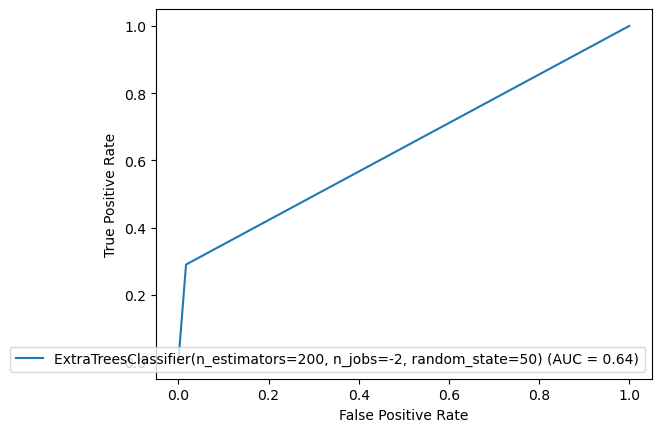

In [57]:
# Plotting ROC and compare AUC for all the models used

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)  #fpr= false positive rate , tpr= true positive rate
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

#AUC = 0.5 indicates a model that performs no better than random chance.
#AUC > 0.5 indicates a model that performs better than random chance.
#AUC = 1 indicates a perfect model.

In [ ]:
""" AUC around 0.5: The model is not better than random chance at distinguishing between positive and negative instances.

AUC between 0.5 and 0.7: The model has low to moderate discrimination power.

AUC between 0.7 and 0.8: The model has acceptable discrimination power.

AUC between 0.8 and 0.9: The model has good discrimination power.

AUC above 0.9: The model has excellent discrimination power. """

In [47]:
# Hyper Parameter Tuning

# Support Vector Classifier (SVC)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'random_state': [10, 50, 1000],
}


In [51]:
# Initialize the Support Vector Classifier
svc_model = SVC()


In [ ]:
# Perform GridSearchCV
grid_search = GridSearchCV(svc_model, parameters, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

In [ ]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


In [ ]:

# Initialize the Support Vector Classifier with chosen hyperparameters
final_svc_model = SVC(C=1, kernel='rbf', gamma='scale', random_state=1000)

# Train the model on the training set
final_svc_model.fit(x_train, y_train)

# Make predictions on the test set
svc_pred = final_svc_model.predict(x_test)

# Calculate and print the accuracy
svc_acc = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {svc_acc * 100}%")

In [ ]:
# Plotting ROC and compare AUC for all the models used

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, svc_pred)  #fpr= false positive rate , tpr= true positive rate
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=final_svc_model)
display.plot()


In [ ]:
#SVC model is taking too much time to execute , thats why going with ExtraTrees Classifier

In [58]:
#Saving he model using .pkl
import joblib
joblib.dump(Final_model,'Red Wine Quality Prediction.pkl')

['Red Wine Quality Prediction.pkl']

In [ ]:
import joblib

# Load the saved model
model = joblib.load('Red Wine Quality Prediction.pkl')

# Make predictions
prediction = model.predict(x_test)
print(prediction)
